In [17]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# "training_data.csv"
data_l= ["training_data_40k_n2_FINAL.csv", "training_data_n1_4L.csv", "training_data_40k_n2_SE_FINAL.csv", "training_data_n1_4M.csv", 
 "training_data_4L_n2_FINAL.csv", "training_data_n1_4M_pt.csv", "training_data_4L_n2_SE_FINAL.csv", "training_data_n1_4k.csv",
 "training_data_4M_n2_SE_FINAL.csv", "training_data_n2_4M_t.csv", "training_data_4M_n2_t2.csv", "training_data_n2_4k_t.csv", 
 "training_data_n1_40k.csv", "ERR875320_40k.csv", "ERR875320_F.csv", "SRR10013451_4M.csv", "SRR10013451_F.csv", "SRR12514558_4M.csv", 
 "SRR12514558_F.csv", "training_data_4L_SE_MIX.csv", "training_data_4L_SE_MIX2.csv"]

frames = []
for fi in data_l:
    fi_open = "trimmomatic/"+fi
    df = pd.read_csv(fi_open)
    frames.append(df)

data = pd.concat(frames)

# print(data.dtypes)
print(data.columns)


# print("Coulmn Name", "Has missing Features?")
# for col in data.columns:
#     print(col, data[col].isnull().values.any())


Index(['run_config', 'sys_name', 'sys_processor', 'sys_phy_cores_count',
       'sys_tot_cores_count', 'sys_cpufreq_mhz', 'sys_phy_mem_bytes',
       'sys_swap_mem_bytes', 'run_settings', 'run_threads', 'run_input1',
       'run_input2', 'run_outputF_1P', 'run_outputF_1U', 'run_outputR_1P',
       'run_outputR_1U', 'run_seedMismatch', 'run_palindromeClipThreshold',
       'run_simpleClipThreshold', 'run_leading', 'run_trailing',
       'run_sliding_size', 'run_sliding_quality', 'run_minlen',
       'run_mi_length', 'run_mi_strict', 'total_exe_time_s',
       'total_wt_tau_time_ms', 'max_bytes_read_mb', 'max_bytes_written_mb',
       'max_read_bw_mbps', 'max_write_bw_mbps', 'run_remove', 'run_cpu_gpu',
       'max_read_bw_mbps.1', 'ys_name'],
      dtype='object')


In [19]:
print("Stats:")
print("Columns totoal:", len(data.columns))
# print(data.head())

imp_columns=['run_config', 'sys_name', 'sys_processor', 'sys_phy_cores_count',
       'sys_tot_cores_count', 'sys_cpufreq_mhz', 'sys_phy_mem_bytes',
       'sys_swap_mem_bytes', 'run_settings', 'run_threads', 'run_input1',
       'run_input2', 'run_outputF_1P', 'run_outputF_1U', 'run_outputR_1P',
       'run_outputR_1U', 'run_seedMismatch', 'run_palindromeClipThreshold',
       'run_simpleClipThreshold', 'run_leading', 'run_trailing',
       'run_sliding_size', 'run_sliding_quality', 'run_minlen',
       'run_mi_length', 'run_mi_strict', 'total_exe_time_s',
       'total_wt_tau_time_ms', 'max_bytes_read_mb', 'max_bytes_written_mb',
       'max_read_bw_mbps', 'max_write_bw_mbps']

target_colum = 'total_exe_time_s'
print("Coulmn Name", "Unique Values?")
for col in imp_columns:
    print(col, data[col].unique())

Stats:
Columns totoal: 36
Coulmn Name Unique Values?
run_config ['run-963.iteration-0' 'run-749.iteration-0' 'run-694.iteration-0' ...
 'run-69.iteration-0' 'run-58.iteration-0' 'run-64.iteration-0']
sys_name ['Linux' nan]
sys_processor ['x86_64']
sys_phy_cores_count [ 2  1 28 48  4]
sys_tot_cores_count [ 2  1 28 48  4]
sys_cpufreq_mhz [2304. 3300. 3900.]
sys_phy_mem_bytes [  2217431040   2217390080 135104114688 201355907072 201355902976
   4112850944]
sys_swap_mem_bytes [ 2147479552 51539603456]
run_settings ['PE' 'SE']
run_threads [50 10  1 40 20  2 48]
run_input1 ['/home/parallels/Documents/Trimmomatic/SRR8293759.1_1_40k.fastq.gz'
 '/home/parallels/Documents/Trimmomatic/SRR8293759.1_1_4L.fastq.gz'
 '/home/parallels/Documents/Trimmomatic/SRR8293759.1_2_40k.fastq.gz'
 '/home/parallels/Documents/Trimmomatic/SRR8293759.1_1_4M.fastq.gz'
 '/home/parallels/Documents/Trimmomatic/SRR8293759.1_2_4L.fastq.gz'
 '/home/parallels/Documents/Trimmomatic/SRR8293759.1_1_4k.fastq.gz'
 '/home/parallels

In [20]:
set_l = []
# do same but attach it to the dataframe
def get_file_size(setting, file_type):
    mul=1
    rr_count=0
    if setting == "PE":
        mul=2
    
    if 'SRR8293759.1_1_40k.fastq.gz' in file_type:
        rr_count=10000
    elif 'SRR8293759.1_1_4L.fastq.gz' in file_type:
        rr_count=100000
    elif 'SRR8293759.1_1_4M.fastq.gz' in file_type:
        rr_count=1000000
    elif 'SRR8293759.1_1_4k.fastq.gz' in file_type:
        rr_count=1000
    elif 'SRR8293759.1_2_40k.fastq.gz' in file_type:
        rr_count=10000
    elif 'SRR8293759.1_2_4L.fastq.gz' in file_type:
        rr_count=100000
    elif 'SRR8293759.1_2_4M.fastq.gz' in file_type:
        rr_count=1000000
    elif 'SRR8293759.1_2_4k.fastq.gz' in file_type:
        rr_count=1000
    elif 'ERR875320.1_1_40k.fastq.gz' in file_type:
        rr_count=40000
    elif 'SRR10013451.1_1_4M.fastq.gz' in file_type:
        rr_count=400000
    elif 'ERR875320.1_1.fastq.gz' in file_type:
        rr_count=173641936
    elif 'SRR12514558.1_1_4M.fastq.gz' in file_type:
        rr_count=400000
    elif 'SRR10013451.1_1.fastq.gz' in file_type:
        rr_count=177013586
    elif 'SRR12514558.1_1.fastq.g' in file_type:
        rr_count=164846758
    else:
        set_l.append(file_type)

    return rr_count*mul
        
data["data_rr_count"] = data.apply(lambda x: get_file_size(x["run_settings"], x["run_input1"]), axis = 1)
print(set(set_l))

{'/home/parallels/Documents/Trimmomatic/SRR12514558.1_1_4L.fastq.gz', '/home/parallels/Documents/Trimmomatic/SRR3509077.1_1_4L.fastq.gz', '/home/parallels/Documents/Trimmomatic/ERR875320.1_1_4L.fastq.gz'}


In [21]:
print("Coulmn Name", "Has missing Features?")
for col in imp_columns+['data_rr_count']:
    print(col, data[col].isnull().values.any())
   

Coulmn Name Has missing Features?
run_config True
sys_name True
sys_processor False
sys_phy_cores_count False
sys_tot_cores_count False
sys_cpufreq_mhz False
sys_phy_mem_bytes False
sys_swap_mem_bytes False
run_settings False
run_threads False
run_input1 False
run_input2 True
run_outputF_1P False
run_outputF_1U True
run_outputR_1P True
run_outputR_1U True
run_seedMismatch False
run_palindromeClipThreshold False
run_simpleClipThreshold False
run_leading False
run_trailing False
run_sliding_size False
run_sliding_quality False
run_minlen False
run_mi_length False
run_mi_strict False
total_exe_time_s False
total_wt_tau_time_ms False
max_bytes_read_mb True
max_bytes_written_mb False
max_read_bw_mbps False
max_write_bw_mbps False
data_rr_count False


In [22]:
Dist_cols = ['sys_phy_cores_count',
       'sys_tot_cores_count', 'sys_cpufreq_mhz', 'sys_phy_mem_bytes',
       'sys_swap_mem_bytes', 'run_threads', 'run_seedMismatch', 'run_palindromeClipThreshold',
       'run_simpleClipThreshold', 'run_leading',
       'run_sliding_size', 'run_sliding_quality', 'run_minlen',
       'run_mi_length', 'run_mi_strict',
       'max_bytes_read_mb', 'max_bytes_written_mb',
       'max_read_bw_mbps', 'max_write_bw_mbps', 'data_rr_count']
target_colum = 'total_exe_time_s'
print("Coulmn Name", "Unique Values?")
for col in Dist_cols:
    print(col, data[col].unique())

all_cols = Dist_cols+[target_colum]
X_Features = data[Dist_cols]
Y_value = data[[target_colum]]
all_data_final=data[all_cols]

Coulmn Name Unique Values?
sys_phy_cores_count [ 2  1 28 48  4]
sys_tot_cores_count [ 2  1 28 48  4]
sys_cpufreq_mhz [2304. 3300. 3900.]
sys_phy_mem_bytes [  2217431040   2217390080 135104114688 201355907072 201355902976
   4112850944]
sys_swap_mem_bytes [ 2147479552 51539603456]
run_threads [50 10  1 40 20  2 48]
run_seedMismatch [5 2]
run_palindromeClipThreshold [16 30 20]
run_simpleClipThreshold [ 8 15 10 30 20]
run_leading [33 15  3]
run_sliding_size [25  4 10]
run_sliding_quality [15 33  3 26]
run_minlen [36 50 25]
run_mi_length [36 50 25]
run_mi_strict [0.2 0.8 0.5]
max_bytes_read_mb [7412. 7346.   nan]
max_bytes_written_mb [   8192. 1665000.]
max_read_bw_mbps [7346. 3706. 5272. 7412. 3673. 4763. 2449. 2636. 1836. 2471. 8192.]
max_write_bw_mbps [2048.  1638.  1365.  1170.  2731.  4096.   819.2]
data_rr_count [    20000    200000     10000   2000000    100000      2000   1000000
     40000 173641936    400000 177013586 164846758         0]


In [23]:
print(all_data_final.shape)

(3362, 21)


(21.0, 0.0)

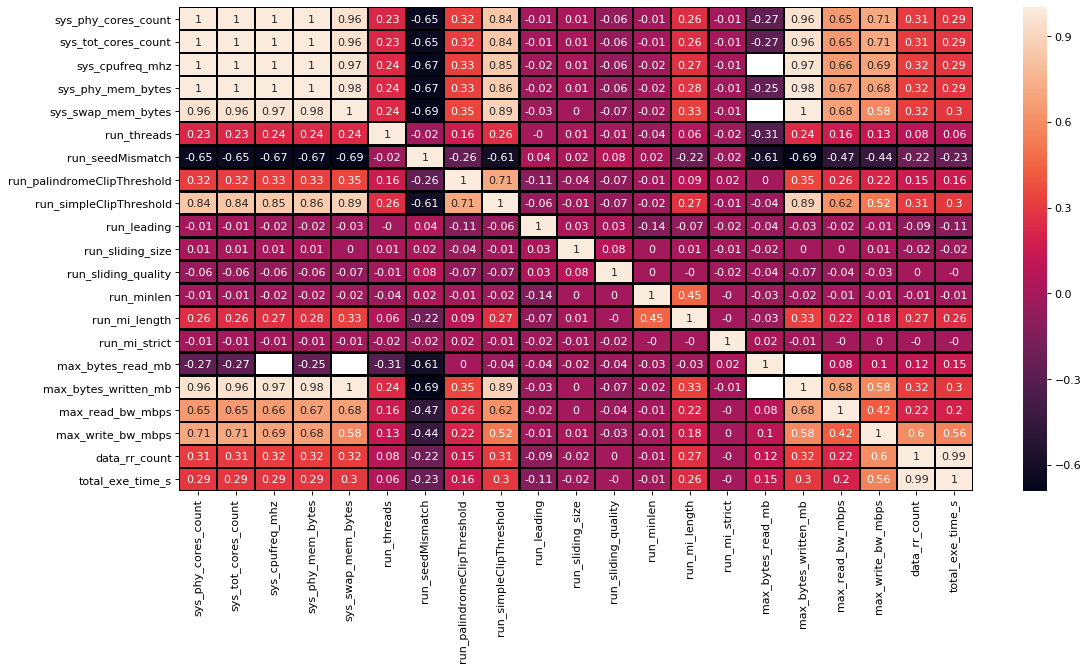

In [24]:
correlation_mat = round(all_data_final.corr(),2)

figure(figsize=(16, 8), dpi=80)
ax = sns.heatmap(correlation_mat, annot = True, xticklabels=all_cols, linewidths=1, linecolor='black')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


***** (3362, 21)


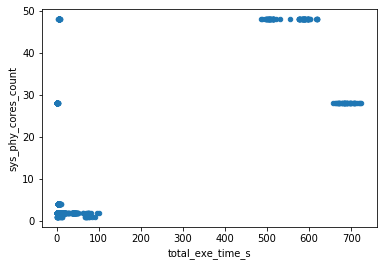

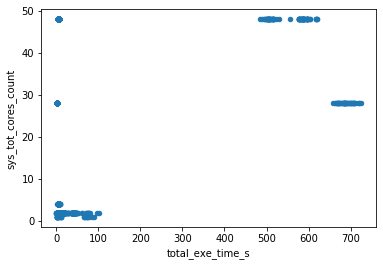

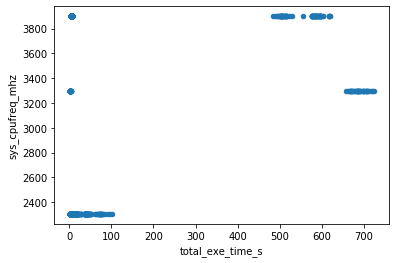

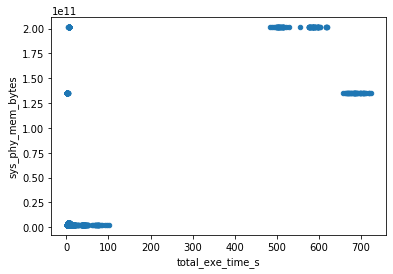

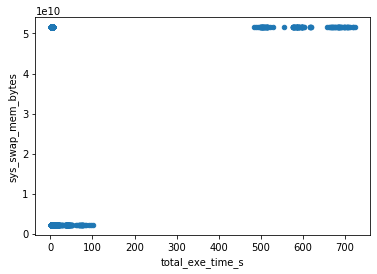

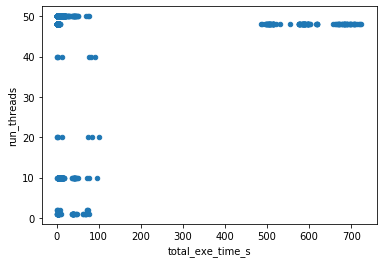

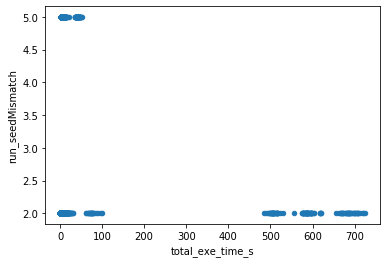

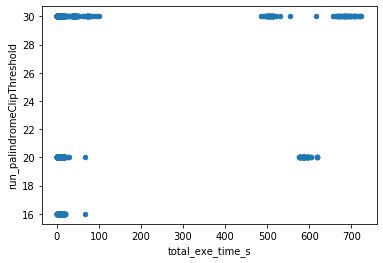

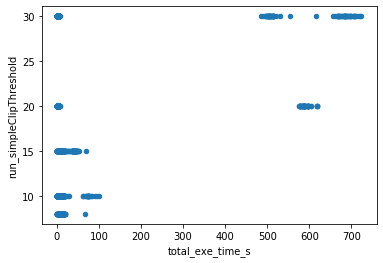

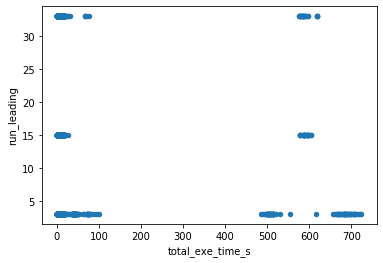

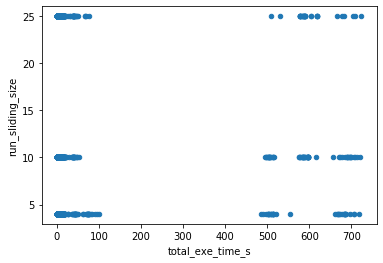

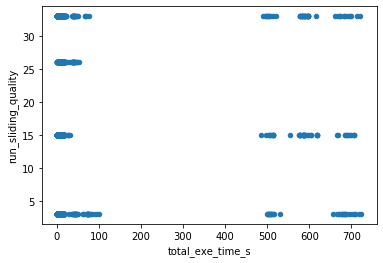

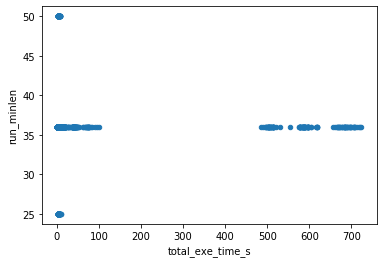

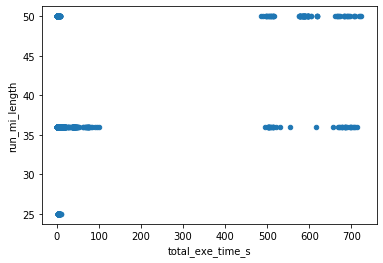

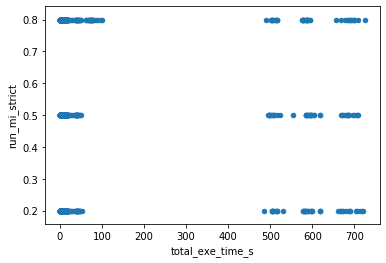

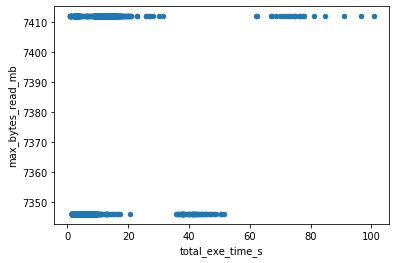

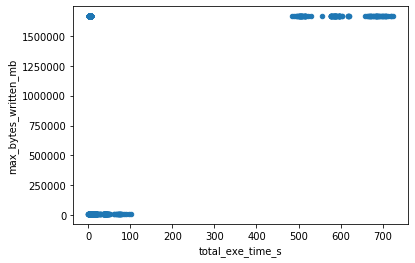

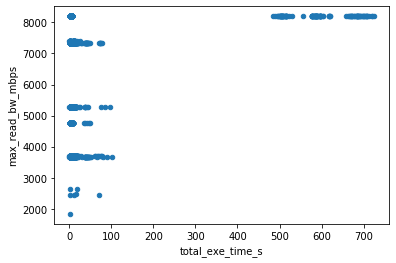

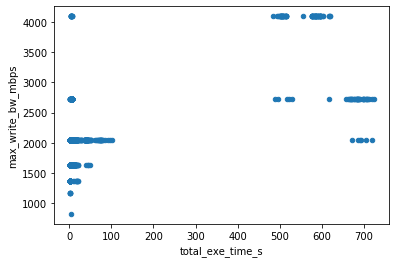

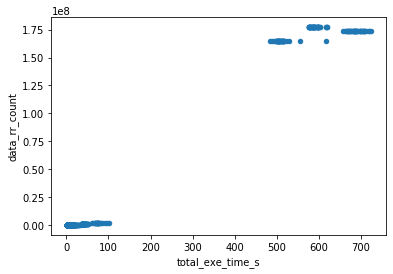

In [25]:
# sns.pairplot(X_Features)
print("*****", all_data_final.shape)
for col in Dist_cols:
    ax = all_data_final.plot.scatter(x=target_colum, y=col)

In [26]:
# Removing Outliers:
"""
all_cols = Dist_cols+[target_colum]
X_Features = data[Dist_cols]
Y_value = data[[target_colum]]
all_data_final=data[all_cols]
all_data_final_noOut=all_data_final[(np.abs(temp) < 2).all(axis=1)]
"""
scaler = StandardScaler()
scaler.fit(all_data_final)
temp = scaler.transform(all_data_final)
# print(np.abs(stats.zscore(df)))
all_data_final_noOut = all_data_final[(np.abs(temp) < 3).all(axis=1)]

/Users/swathimanikyavallabhajosyula/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/swathimanikyavallabhajosyula/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [27]:
print("before:", all_data_final.shape,"After:", all_data_final_noOut.shape)

before: (3362, 21) After: (2238, 21)


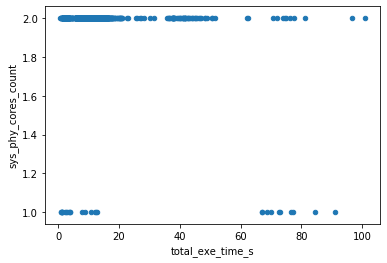

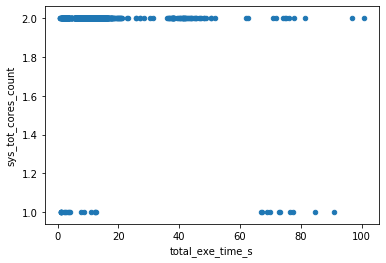

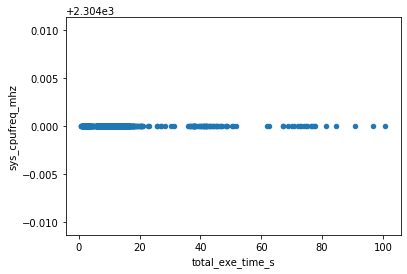

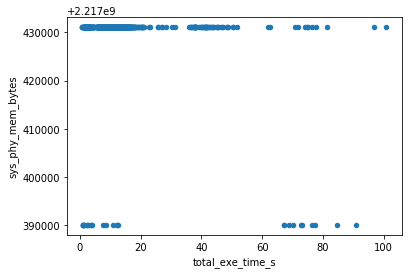

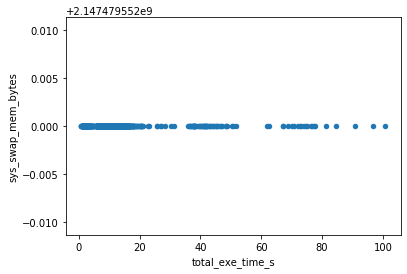

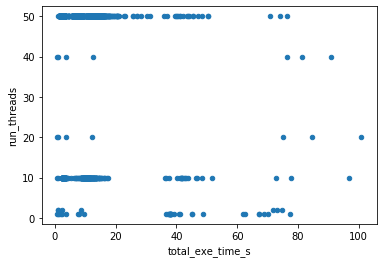

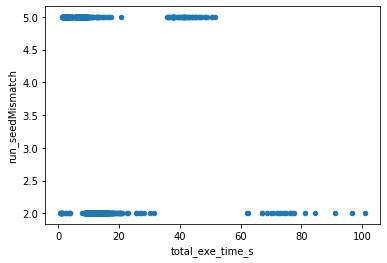

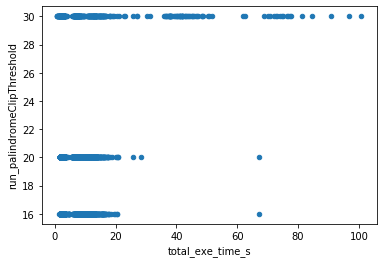

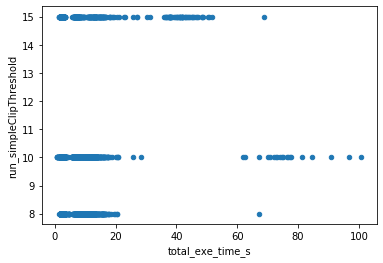

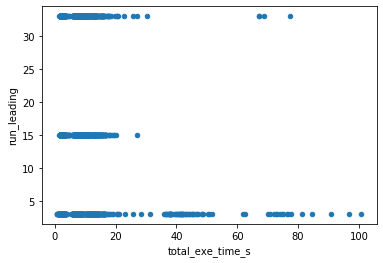

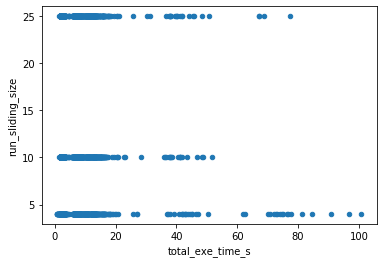

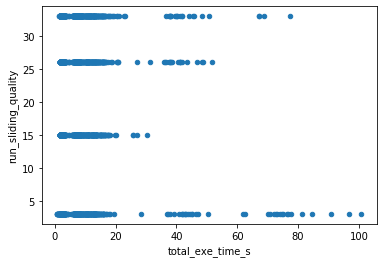

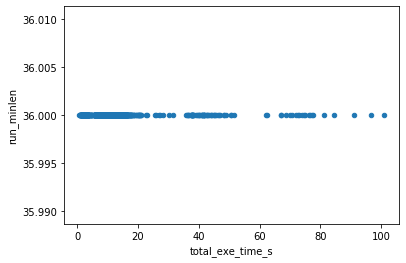

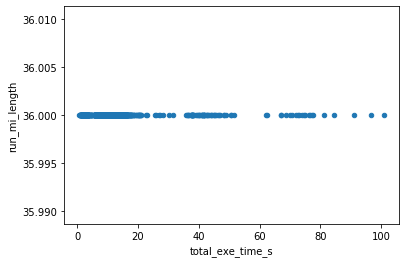

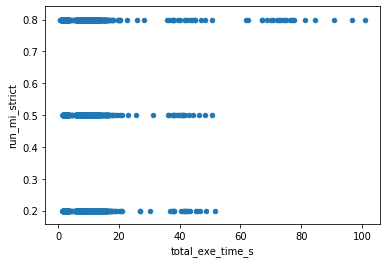

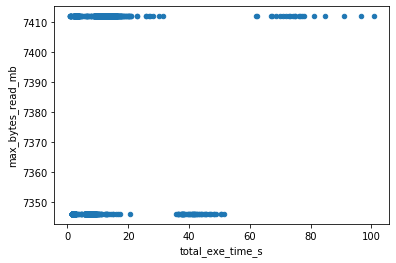

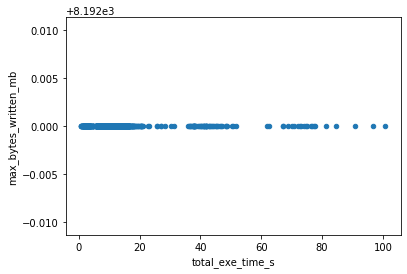

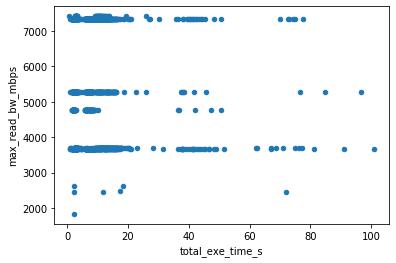

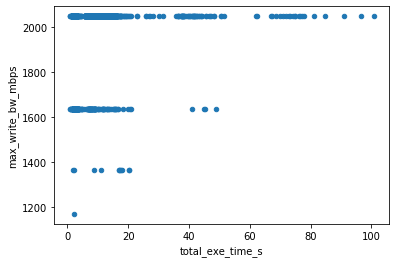

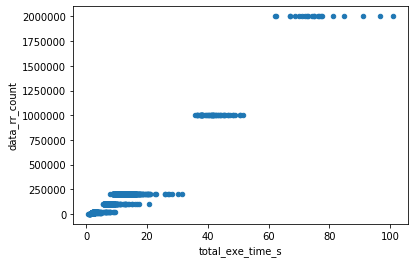

In [28]:
for col in Dist_cols:
    ax = all_data_final_noOut.plot.scatter(x=target_colum, y=col)

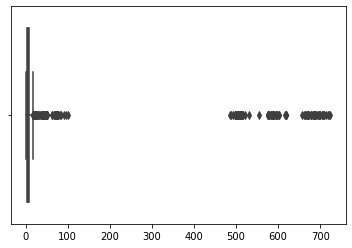

In [29]:
sns.boxplot(all_data_final[[target_colum]])

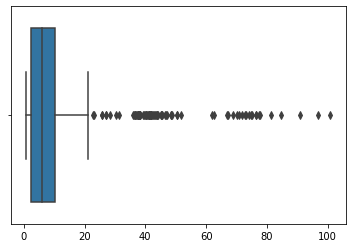

In [30]:
sns.boxplot(all_data_final_noOut[[target_colum]])

In [31]:
print("Before Clean Up:", all_data_final.shape, "After Clean up:", all_data_final_noOut.shape)

all_data_final_noOut.to_csv('tr_noPCA.csv', header=True, index=False)
print(Dist_cols)

Before Clean Up: (3362, 21) After Clean up: (2238, 21)
['sys_phy_cores_count', 'sys_tot_cores_count', 'sys_cpufreq_mhz', 'sys_phy_mem_bytes', 'sys_swap_mem_bytes', 'run_threads', 'run_seedMismatch', 'run_palindromeClipThreshold', 'run_simpleClipThreshold', 'run_leading', 'run_sliding_size', 'run_sliding_quality', 'run_minlen', 'run_mi_length', 'run_mi_strict', 'max_bytes_read_mb', 'max_bytes_written_mb', 'max_read_bw_mbps', 'max_write_bw_mbps', 'data_rr_count']


In [32]:
print(all_data_final_noOut.columns)

Index(['sys_phy_cores_count', 'sys_tot_cores_count', 'sys_cpufreq_mhz',
       'sys_phy_mem_bytes', 'sys_swap_mem_bytes', 'run_threads',
       'run_seedMismatch', 'run_palindromeClipThreshold',
       'run_simpleClipThreshold', 'run_leading', 'run_sliding_size',
       'run_sliding_quality', 'run_minlen', 'run_mi_length', 'run_mi_strict',
       'max_bytes_read_mb', 'max_bytes_written_mb', 'max_read_bw_mbps',
       'max_write_bw_mbps', 'data_rr_count', 'total_exe_time_s'],
      dtype='object')


## RUNNING PCA

In [33]:
"""
all_cols = Dist_cols+[target_colum]
X_Features = data[Dist_cols]
Y_value = data[[target_colum]]
all_data_final=data[all_cols]
all_data_final_noOut=all_data_final[(np.abs(temp) < 2).all(axis=1)]
"""

X_Features_noOut = all_data_final_noOut[Dist_cols]
x = X_Features_noOut.values
X_Features_noOut_norm = StandardScaler().fit_transform(x)
all_data_final_noOut_norm = pd.DataFrame(X_Features_noOut_norm, columns=Dist_cols)

pca_test = PCA(n_components=len(Dist_cols), random_state=2020)
pca_test.fit(X_Features_noOut_norm)
x_pca_test = pca_test.transform(X_Features_noOut_norm)
print(pca_test.explained_variance_ratio_*100)
print(np.cumsum(pca_test.explained_variance_ratio_*100))


[2.31170744e+01 1.38164338e+01 1.20749898e+01 7.37237492e+00
 6.82066738e+00 6.69288985e+00 6.47800802e+00 6.42908706e+00
 5.93144335e+00 5.03976341e+00 4.15499523e+00 1.98531429e+00
 8.69584652e-02 2.67300927e-29 2.63326535e-31 2.79408440e-32
 9.93435764e-33 2.28961545e-33 1.03301854e-49 2.12682131e-65]
[ 23.11707438  36.93350819  49.00849802  56.38087294  63.20154032
  69.89443017  76.37243819  82.80152526  88.73296861  93.77273201
  97.92772724  99.91304153 100.         100.         100.
 100.         100.         100.         100.         100.        ]


In [34]:
# pca_test = PCA(n_components=len(Dist_cols), random_state=2020)
# pca_test.fit(X_Features_noOut_norm)
# x_pca_test = pca_test.transform(X_Features_noOut_norm)
# print(pca_test.explained_variance_ratio_*100)
# print(np.cumsum(pca_test.explained_variance_ratio_*100))


no_of_fetures = 12
pca_n = PCA(n_components=no_of_fetures, random_state=2020)
pca_n.fit(X_Features_noOut_norm)
x_pca_n = pca_n.transform(X_Features_noOut_norm)
print(pca_n.explained_variance_ratio_*100)
print(np.cumsum(pca_n.explained_variance_ratio_*100))


df_pca = pd.DataFrame(x_pca_n)
df_pca['walltime'] = all_data_final_noOut[target_colum].values
# df_pca.describe()

[23.11707438 13.81643381 12.07498982  7.37237492  6.82066738  6.69288985
  6.47800802  6.42908706  5.93144335  5.03976341  4.15499523  1.98531429]
[23.11707438 36.93350819 49.00849802 56.38087294 63.20154032 69.89443017
 76.37243819 82.80152526 88.73296861 93.77273201 97.92772724 99.91304153]


(12.0, 0.0)

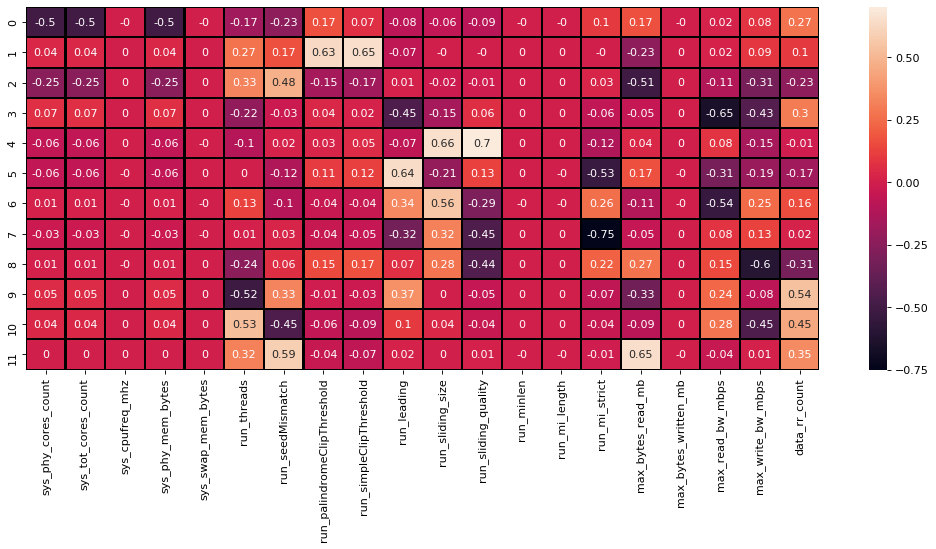

In [40]:
figure(figsize=(16, 6), dpi=80)
values_temp=pca_n.components_.round(2)
ax = sns.heatmap(values_temp, xticklabels=Dist_cols, linewidths=1, linecolor='black', annot = True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [36]:
df_pca.to_csv('trimmomatic_pca.csv', header=True, index=False)

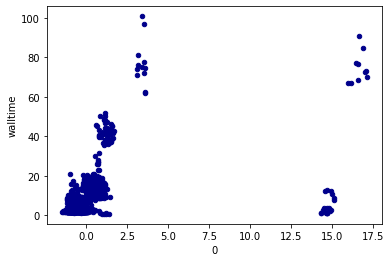

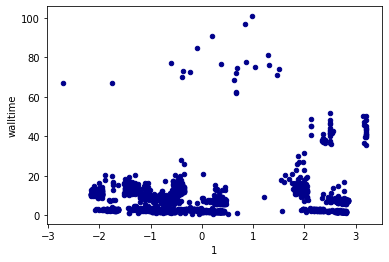

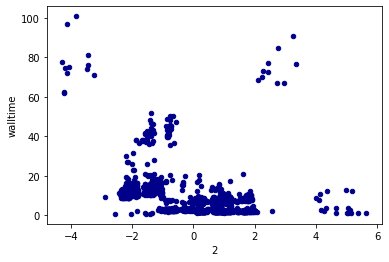

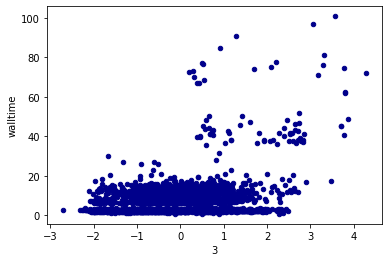

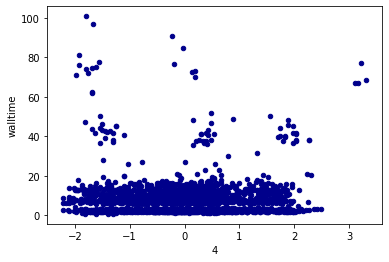

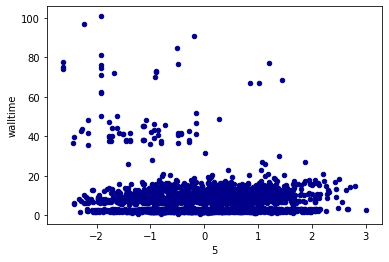

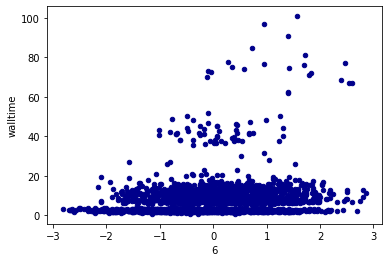

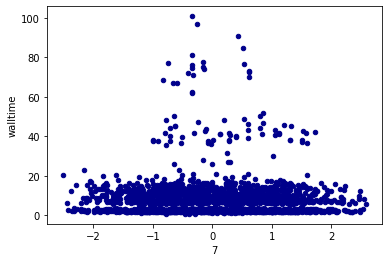

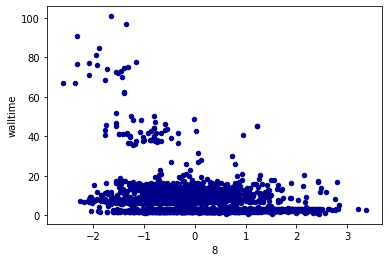

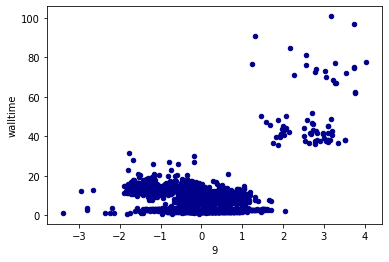

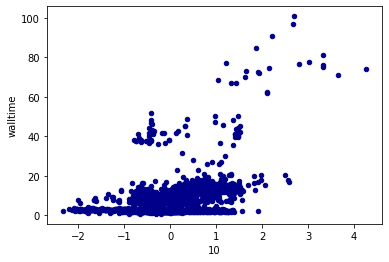

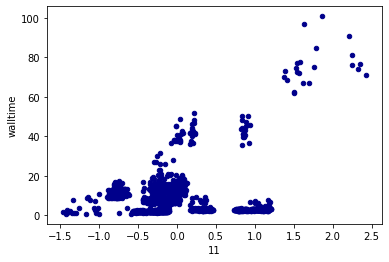

In [37]:
for i in range(0, 12):
    ax1 = df_pca.plot.scatter(x=i, y='walltime', c='DarkBlue')
    # ax1 = df_pca.plot.scatter(y=0, c=1, x='walltime',  colormap='viridis')

In [ ]:
df_pca.head()